# Business Problem
In reent years, City and Resort hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result,
including fewer revenues and less than ideal hotel use. Coseuentlly, lowering cancellation rates is both hotels is primary goal in order 
to increase their revenue and for us to offer through business advice to address their problem.
The analysis for hotel booking cancellation as well as other factors that have no bearing on their business and yearly revenue generation 
are the main topic of the report



<!-- 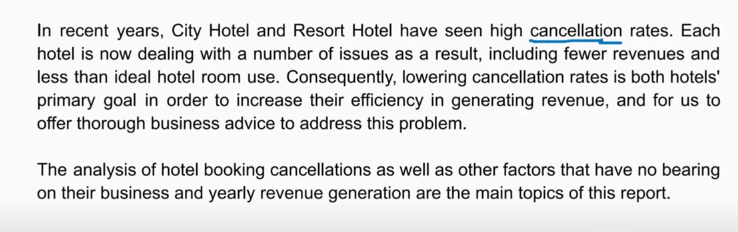 -->

# Assumptions 
1. No unusual occurrences between 2005 and 2017 will have a substantial impact on the data used 
2. The information is still current and can be used to analyze a hotels possible plan in an efficient manner 
3. There are no unantiipated negative to the hotel employing any advised technique 
4. The hotel are not currently using any of the suggested solution 
5. The biggest factor affecting the effectiveness of earning income is booking cancellation 
6. clients make reserations the same year they make cancellations 

# Research Questions 
1. What are the variables that affect the hotel reservations cancellation?
2. How can we make hotels reservations cancellation lower?
3. How will hotels be assisted in making and promotional decisions?

# Hypothesis 
1. More cancellations occur when price are higher 
2. When there is longer waiting list, customers tend to cancel more freuently 
3. The majority of clients are coming form offline travel agents to make their reservations 

<!-- 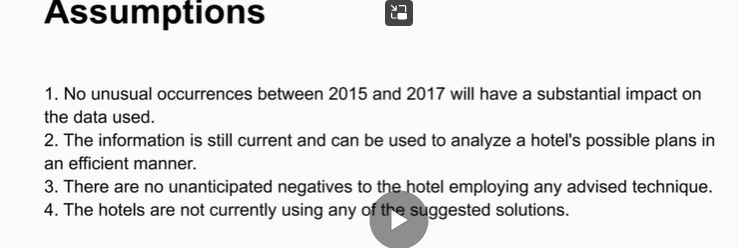 -->
<!-- 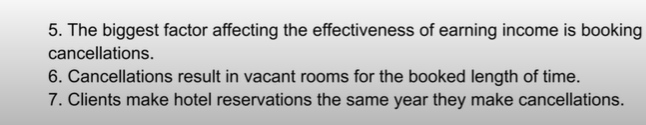 -->
<!-- 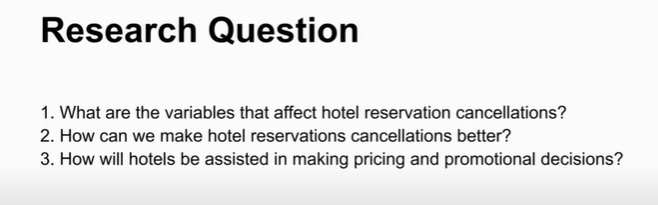 -->
<!-- 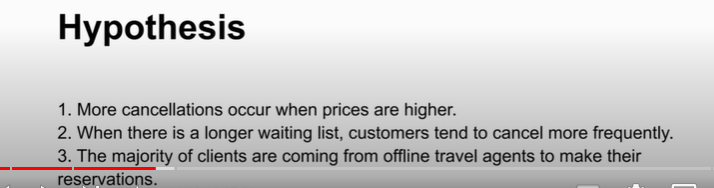 -->

# Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df = pd.read_csv('hotel_bookings 2.csv')

# Exploratry Data Analysis and Data Cleaning 

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('_'*50)

hotel
['Resort Hotel' 'City Hotel']
__________________________________________________
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
__________________________________________________
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
__________________________________________________
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['agent','company'],axis=1, inplace=True)
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118898.0,0.371352,0.483168,0.00,0.0,0.0,1.0,1.0
lead_time,118898.0,104.311435,106.903309,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118898.0,2016.157656,0.707459,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118898.0,27.166555,13.589971,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118898.0,15.800880,8.780324,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118898.0,0.928897,0.996216,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118898.0,2.502145,1.900168,0.00,1.0,2.0,3.0,41.0
adults,118898.0,1.858391,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118898.0,0.007948,0.097380,0.00,0.0,0.0,0.0,10.0


<AxesSubplot:>

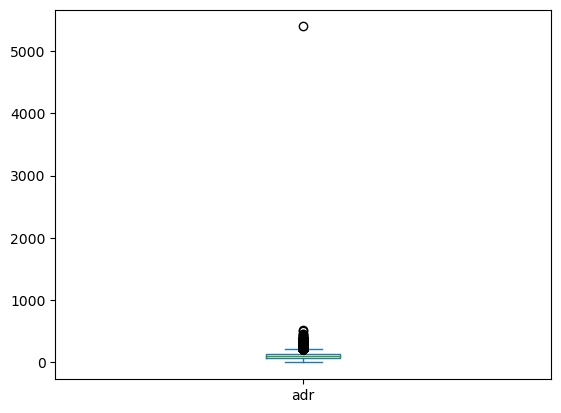

In [16]:
df['adr'].plot(kind='box')

In [17]:
df = df[df['adr']< 5000]

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118897.0,0.371347,0.483167,0.00,0.0,0.0,1.0,1.0
lead_time,118897.0,104.312018,106.903570,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118897.0,2016.157657,0.707462,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118897.0,27.166674,13.589966,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118897.0,15.800802,8.780321,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118897.0,0.928905,0.996217,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118897.0,2.502157,1.900171,0.00,1.0,2.0,3.0,41.0
adults,118897.0,1.858390,0.578578,0.00,2.0,2.0,2.0,55.0
children,118897.0,0.104208,0.399174,0.00,0.0,0.0,0.0,10.0
babies,118897.0,0.007948,0.097381,0.00,0.0,0.0,0.0,10.0


<AxesSubplot:>

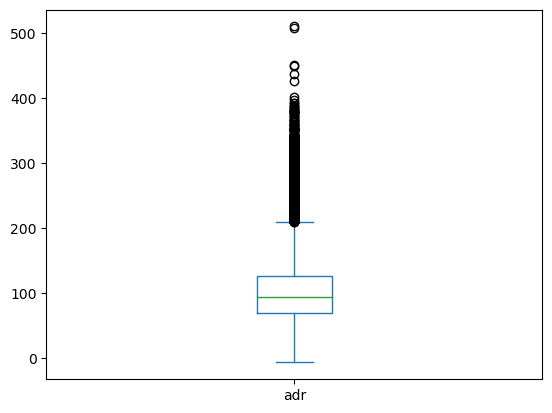

In [19]:
df['adr'].plot(kind='box')

# Data Analysis and Visualization

In [20]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)*100
cancelled_perc

0    62.865337
1    37.134663
Name: is_canceled, dtype: float64

In [21]:
# 0 ==> not cancelled
# 1 ==> is cancelled

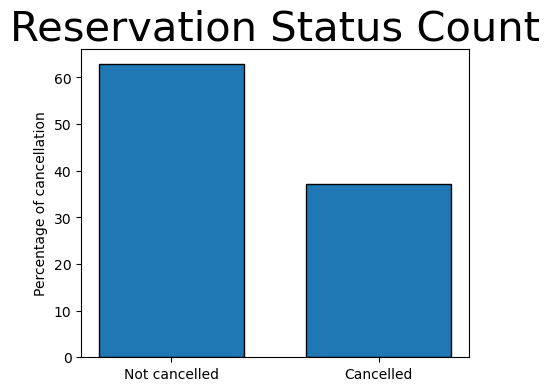

In [79]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count',size=30)
plt.bar(['Not cancelled','Cancelled'],cancelled_perc, edgecolor = 'k',width = 0.7)
plt.ylabel('Percentage of cancellation')
plt.show()

## conclusion =
-  62.86%  not get cancelled booking 
-  37.13% is being cancelled
- so almost half of booking get cancelled and it is serious problem

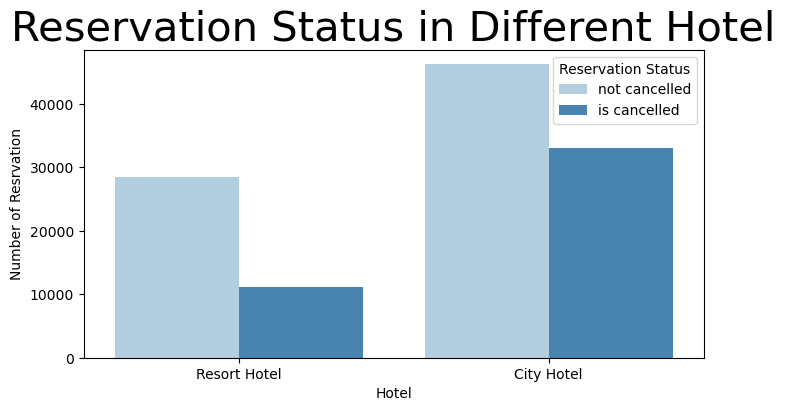

In [23]:
# legend_labels,_=ax1,get_legend_handles_labels()
plt.figure(figsize=(8,4))
plt.title('Reservation Status in Different Hotel', size=30)
# ax1.legend(bbox_to_anchor=(1,1))
sns.countplot(x='hotel', hue = 'is_canceled', data=df,palette='Blues')
plt.legend(title='Reservation Status', loc='upper right',labels=['not cancelled', 'is cancelled'])
plt.xlabel("Hotel")
plt.ylabel('Number of Resrvation')

plt.show()

## conclustion =
- in resort hotel cancellation rate
- 72.02% booking is happened 
- 27.97%  booking is getting canselled 
- in city hotel cancellation rate 
- 58.29% booking is happened 
- 41.70% booking is cancelled
- so. in city hotel cancellation rate is relatively higher side 

In [24]:
resort_hotel = df[df['hotel'] =='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [25]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

In [26]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

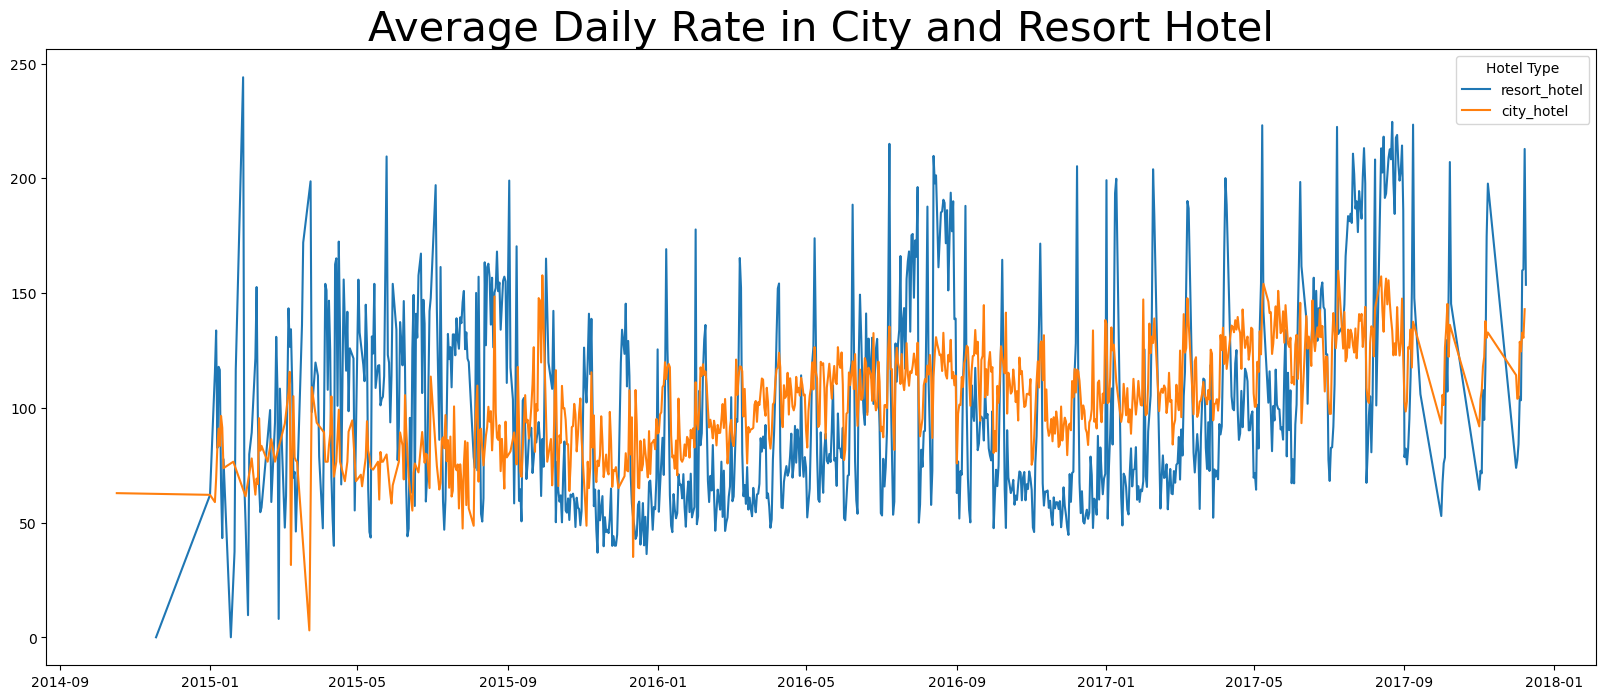

In [82]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'],label = 'resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'],label = 'city Hotel')
plt.legend(title='Hotel Type',loc='upper right',labels=['resort_hotel', 'city_hotel'])
plt.show()

## conclusion 
- Average Daily Rate in City and Resort Hotel
- resort hotel has relatively higher flucuation in cancellation 

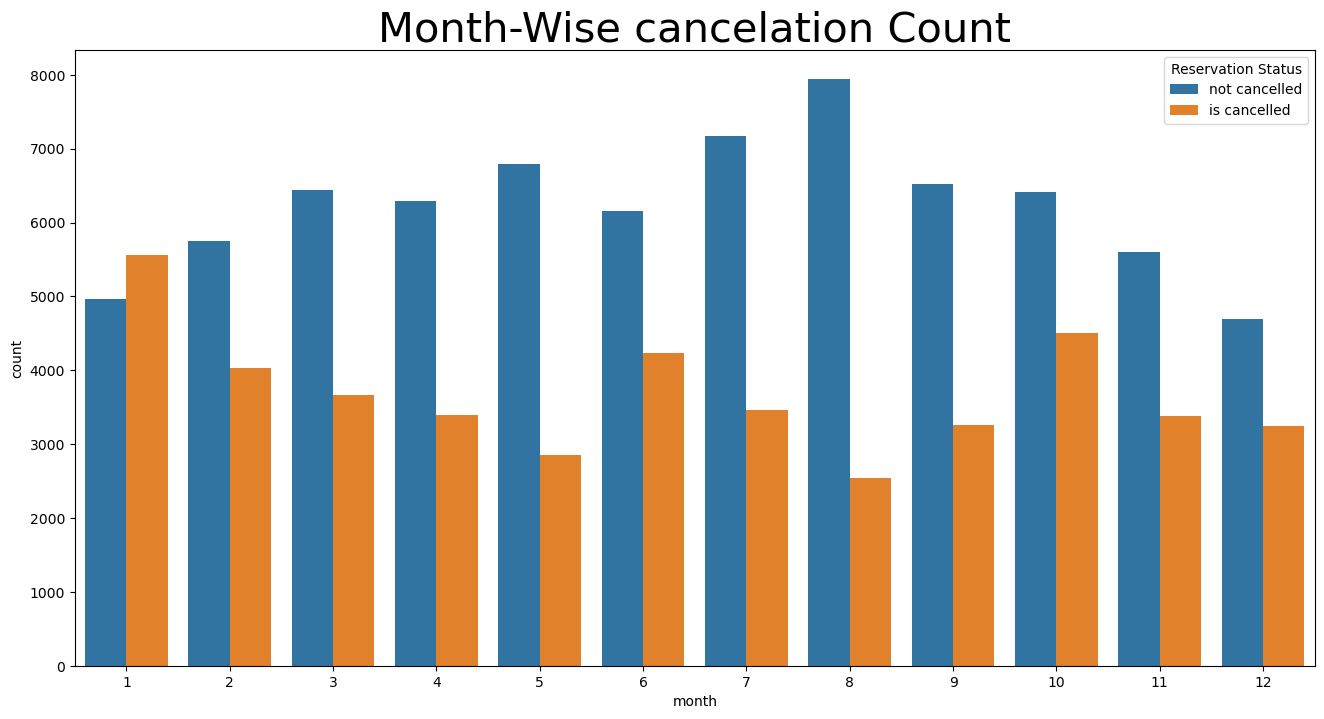

In [28]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
plt.title('Month-Wise cancelation Count', fontsize = 30)
g=sns.countplot(x = 'month',hue='is_canceled', data = df)
plt.legend(title='Reservation Status',loc='upper right',labels=['not cancelled', 'is cancelled'])
plt.show(g)

# 0 ==> not cancelled
# 1 ==> is cancelled

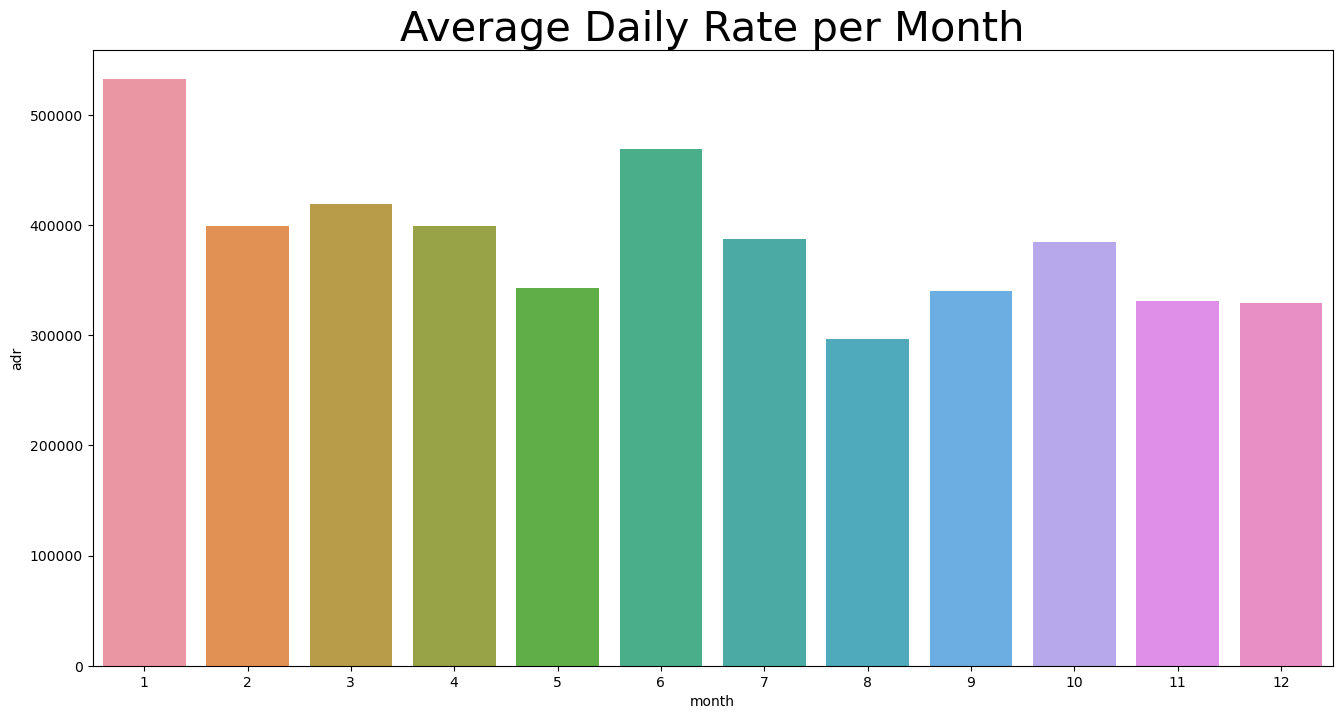

In [29]:
plt.figure(figsize = (16,8))
plt.title('Average Daily Rate per Month', fontsize = 30)
sns.barplot('month','adr',data=df[df['is_canceled'] ==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

## conlusion = 
- cancelation rate is directly proportional to the Hotel price 
- people book the hotel but at last time  it seems that people cancel the booking due to higher price 

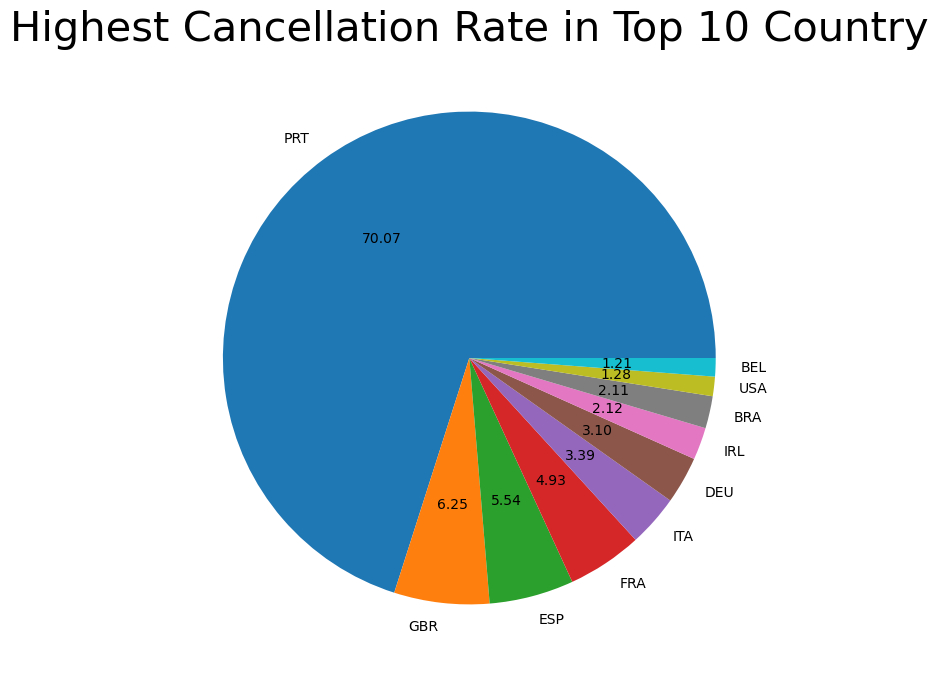

In [31]:
cancelled_data = df[df['is_canceled'] == 1]
cancelled_data
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country
plt.figure(figsize=(8,8))
plt.title('Highest Cancellation Rate in Top 10 Country', fontsize = 30)
plt.pie(top_10_country, autopct='%.2f',labels=top_10_country.index)
plt.show()

## conclusion 
- portugal has higher rate of cancellation about 70%

In [32]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [33]:
df['market_segment'].value_counts()


Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [34]:
df['market_segment'].value_counts(normalize=True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

In [35]:
cancelled_data['market_segment'].value_counts(normalize=True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

## conclusion =
- as we can see around 47% of booking came from online Traval agency and supersingly around 46% cancellation 
- also happened from customer booking form online Traval agency 

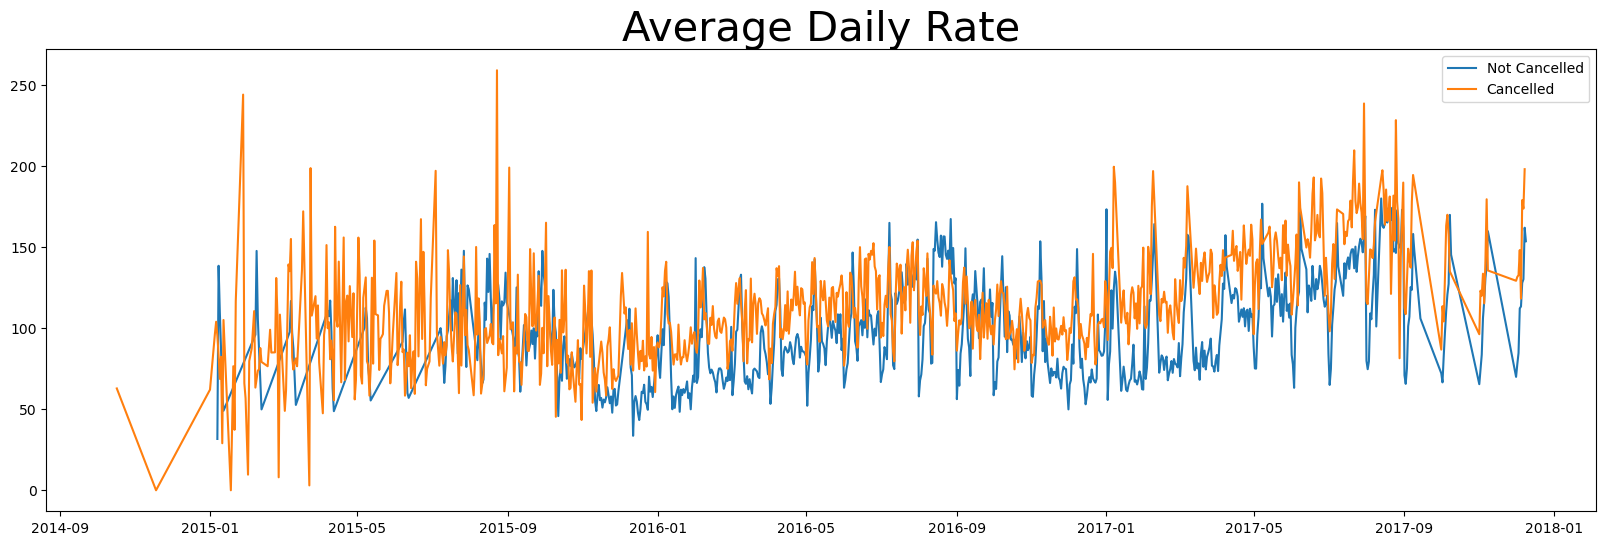

In [77]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate",fontsize= 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
plt.legend()
plt.show()

In [76]:
# cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] >'2016-01') & (cancelled_df_adr['reservation_status_date']>'2017-05')]
# not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date']>'2017')]

In [78]:
# plt.figure(figsize=(20,6))
# plt.title("Average Daily Rate",fontsize= 30)
# # plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'Not Cancelled')
# plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
# plt.legend()
# plt.show()

## conclusion =
- average daily rate is the most influencial factor in cancellation of reservation 



For the analysis using sql, it would be better if you have the dataset in the database in different tables, so you can run different queries to get your meaningful insights. 

When you have not that spread data like 2 to 3 data files then using python and loading it into scripts and notebook would be good. And both are good when you need to get an answer. 

Power bi and tableau visualizations is important when you need to show the data in a meaningful form to anyone and don't need an answer to a particular business problem but just to see the data through out the time. I hope this makes sense and you get your answer